In [ ]:
# Covid-19 Analysis

In [3]:
# Setup and Installation
!pip install plotly
!pip install prophet


In [4]:
# Import Important Libraries
import pandas as pd
import plotly.express as px
from prophet import Prophet
import warnings
warnings.filterwarnings("ignore")


In [ ]:
# Import Dataset

In [1]:
from google.colab import files
uploaded = files.upload()


Saving covid_19_clean_complete.csv to covid_19_clean_complete.csv


In [2]:
import pandas as pd
df = pd.read_csv('covid_19_clean_complete.csv')
df.head()


,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [5]:
# Basic Exploration and Cleaning

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check unique countries
print(df['Country/Region'].nunique())
print(df['Country/Region'].unique()[:10])


187
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria']


In [6]:
# Aggregate Data (Global and India)
# Group by Date and sum up values globally
global_df = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()

# India-only Data
india_df = df[df['Country/Region'] == 'India']
india_df = india_df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()


In [7]:
# Global Trend Visualization (Interactive)
fig = px.line(global_df, x='Date', y=['Confirmed', 'Deaths', 'Recovered'],
              title='Global COVID-19 Trends')
fig.show()


In [8]:
# India Trend Visualization
fig = px.line(india_df, x='Date', y=['Confirmed', 'Deaths', 'Recovered'],
              title='India COVID-19 Trends')
fig.show()


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjkmvx7fz/gyfrwizy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjkmvx7fz/jk5l0l9i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44527', 'data', 'file=/tmp/tmpjkmvx7fz/gyfrwizy.json', 'init=/tmp/tmpjkmvx7fz/jk5l0l9i.json', 'output', 'file=/tmp/tmpjkmvx7fz/prophet_model0_16g0k9/prophet_model-20250716090651.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:06:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:06:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


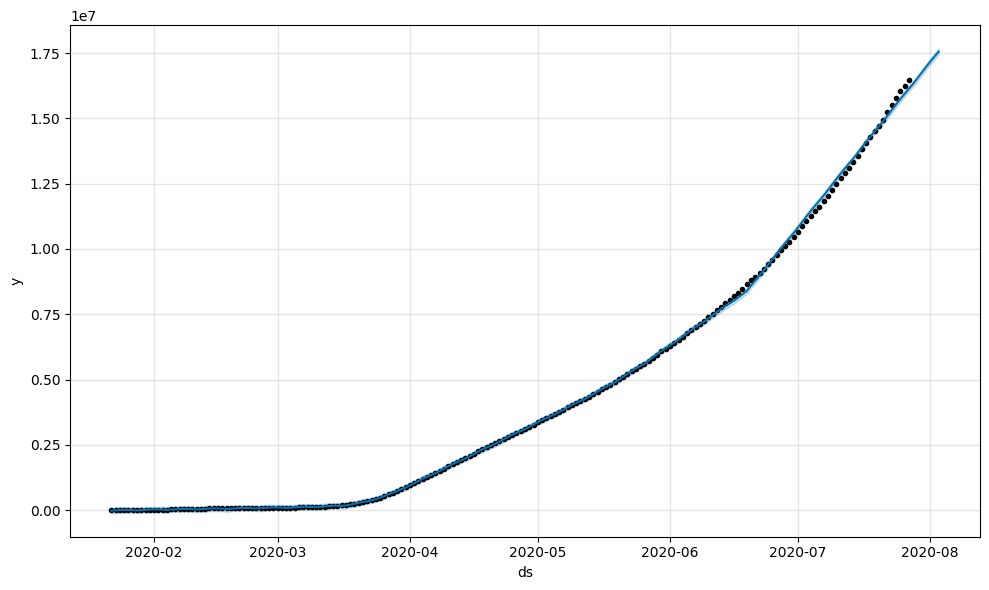

In [9]:
# Forecasting with Facebook Prophet (eg. Global confirmed Cases)
# Preparing data for Prophet
confirmed_prophet = global_df[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})

# Initialize and fit the model
model = Prophet()
model.fit(confirmed_prophet)

# Create future dataframe for 7 days
future = model.make_future_dataframe(periods=7)
forecast = model.predict(future)

# Visualize the forecast
fig = model.plot(forecast)


INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjkmvx7fz/yfijxwqh.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjkmvx7fz/35jfuhbc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58625', 'data', 'file=/tmp/tmpjkmvx7fz/yfijxwqh.json', 'init=/tmp/tmpjkmvx7fz/35jfuhbc.json', 'output', 'file=/tmp/tmpjkmvx7fz/prophet_modeltbtpjfuo/prophet_model-20250716090717.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:07:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:07:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


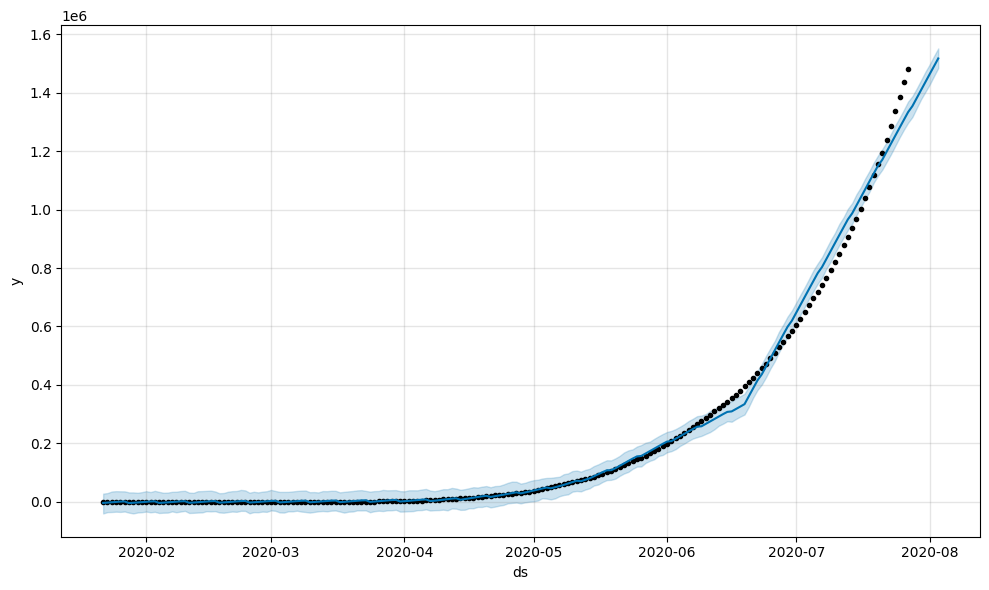

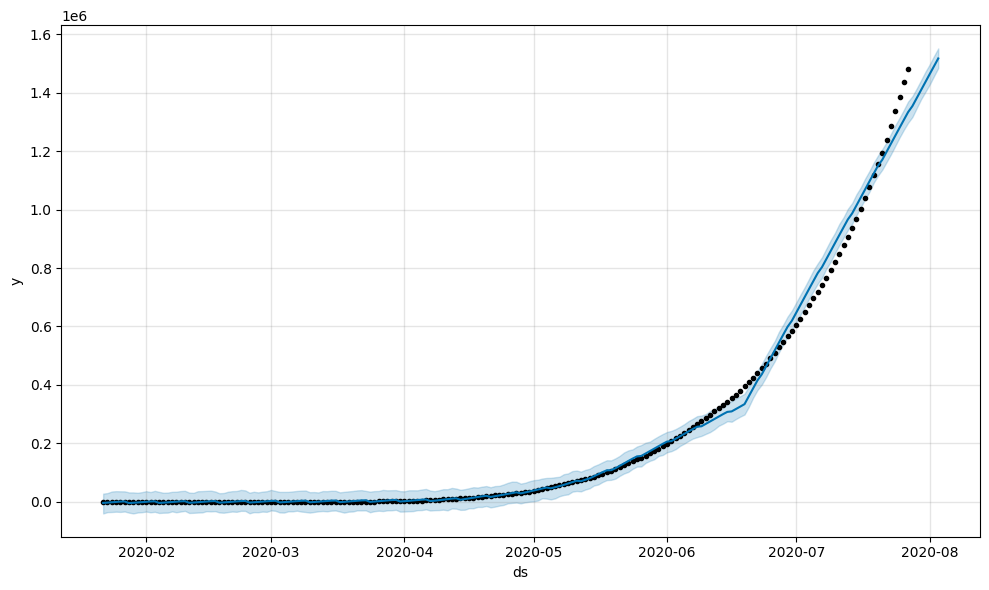

In [10]:
# Optional - Forecasting for India
# India forecasting
india_prophet = india_df[['Date', 'Confirmed']].rename(columns={'Date': 'ds', 'Confirmed': 'y'})
model_india = Prophet()
model_india.fit(india_prophet)

future_india = model_india.make_future_dataframe(periods=7)
forecast_india = model_india.predict(future_india)

# Plot
model_india.plot(forecast_india)
